<a href="https://colab.research.google.com/github/habash2125/Small-ML-projects/blob/main/Emnist_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt

from random import shuffle

from sklearn.model_selection import train_test_split

from time import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization ,Flatten,Dense, Activation,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

from sklearn.metrics import confusion_matrix,classification_report

from sklearn.model_selection import KFold

from sklearn.svm import SVC

In [4]:
from google.colab import drive

drive.mount('/content/drive')


path1 = "/content/drive/MyDrive/Colab Notebooks/emnist/emnist-balanced-test.csv"
path2 = "/content/drive/MyDrive/Colab Notebooks/emnist/emnist-balanced-train.csv"
test = pd.read_csv(path1)
train = pd.read_csv(path2)

Mounted at /content/drive


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112799 entries, 0 to 112798
Columns: 785 entries, 45 to 0.533
dtypes: int64(785)
memory usage: 675.6 MB


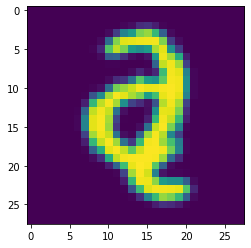

In [6]:
x=train.iloc[0,1:]
x=x.values.reshape(28,28)
xt=x.T
plt.imshow(xt)

In [7]:
train.iloc[1,0] 

43

In [8]:
train.head()

,45,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532,0.533
0,36,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,43,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,42,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
x_train=train.drop('45',axis=1)
y_train=train['45']


In [10]:
y_train

0         36
1         43
2         15
3          4
4         42
          ..
112794    22
112795    17
112796    23
112797    31
112798     8
Name: 45, Length: 112799, dtype: int64

Text(0.5, 1.0, 'training numbers and letters')

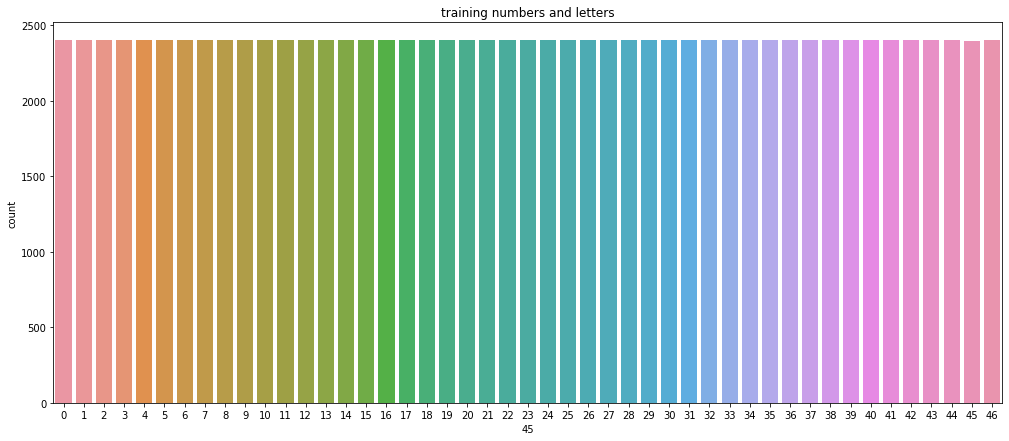

In [11]:
fig=plt.figure;
fig(figsize=(17,7));
sns.countplot(x=y_train);
plt.title("training numbers and letters") 

In [12]:
x_test=test.drop('41',axis=1)
y_test=test['41']

In [13]:
test.head()

,41,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.523,0.524,0.525,0.526,0.527,0.528,0.529,0.530,0.531,0.532
0,39,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,44,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,33,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


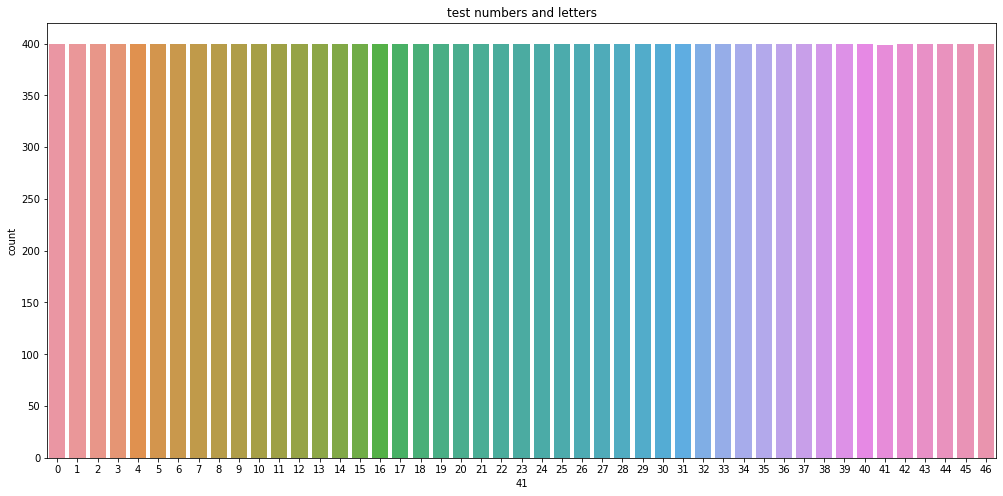

In [14]:
fig(figsize=(17,8))
sns.countplot(x=y_test);
plt.title("test numbers and letters");

In [15]:
label_map=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emnist/emnist-balanced-mapping.txt',index_col=0,header=None,delimiter=" ",squeeze=True)

In [16]:
type(label_map)

pandas.core.series.Series

In [17]:
label_map.shape

(47,)

In [18]:
label_map.iloc[0]

48

In [19]:
label_dict={}
for indx, lab in enumerate(label_map) :
    label_dict[indx]=chr(lab)
    #print(indx)
    
label_dict;

In [20]:
from keras.utils import np_utils
num_of_class=y_train.nunique()

In [21]:
y_train = np_utils.to_categorical(y_train,num_classes=num_of_class)
y_test = np_utils.to_categorical(y_test, num_classes=num_of_class)


In [22]:
y_test.shape

(18799, 47)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [24]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [25]:
def rotate(image):
    image = image.reshape([H, W])
    image = np.fliplr(image)
    image = np.rot90(image)
    return image
H = 28
W = 28

In [26]:
x_train = np.asarray(x_train)
x_train = np.apply_along_axis(rotate, 1, x_train)

x_test = np.asarray(x_test)
x_test = np.apply_along_axis(rotate, 1, x_test)


x_train = x_train.reshape(-1, W, H, 1)
x_test= x_test.reshape(-1,W,H,1)

In [27]:
import tensorflow as tf


from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import layers
from keras.layers import *
from keras.utils import np_utils


In [55]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [44]:
model = Sequential()

model.add(layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(W, H, 1)))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(strides=2))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(num_of_class, activation='softmax'))

In [58]:
from keras import callbacks
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_accuracy',patience=3)


model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy',f1_m])


In [59]:
model.fit(x=x_train,y=y_train,epochs=20,batch_size=256,validation_split=0.1,callbacks=[early_stopping])

Epoch 1/20
397/397 [==============================] - 5s 9ms/step - loss: 0.9360 - accuracy: 0.7198 - f1_m: 0.6984 - val_loss: 0.5306 - val_accuracy: 0.8174 - val_f1_m: 0.8164
Epoch 2/20
397/397 [==============================] - 3s 8ms/step - loss: 0.4486 - accuracy: 0.8465 - f1_m: 0.8477 - val_loss: 0.4376 - val_accuracy: 0.8450 - val_f1_m: 0.8465
Epoch 3/20
397/397 [==============================] - 3s 8ms/step - loss: 0.3793 - accuracy: 0.8662 - f1_m: 0.8667 - val_loss: 0.3976 - val_accuracy: 0.8551 - val_f1_m: 0.8562
Epoch 4/20
397/397 [==============================] - 3s 8ms/step - loss: 0.3387 - accuracy: 0.8787 - f1_m: 0.8788 - val_loss: 0.3747 - val_accuracy: 0.8616 - val_f1_m: 0.8636
Epoch 5/20
397/397 [==============================] - 3s 8ms/step - loss: 0.3094 - accuracy: 0.8861 - f1_m: 0.8869 - val_loss: 0.3788 - val_accuracy: 0.8623 - val_f1_m: 0.8623
Epoch 6/20
397/397 [==============================] - 3s 8ms/step - loss: 0.2893 - accuracy: 0.8922 - f1_m: 0.8929 - val

In [31]:
loss=pd.DataFrame(model.history.history)

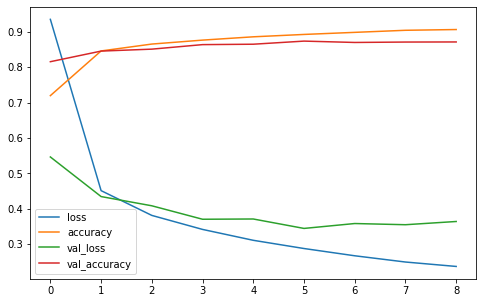

In [32]:
loss.plot(figsize=(8,5))

In [33]:
model.evaluate(x_test,y_test)

588/588 [==============================] - 2s 3ms/step - loss: 0.3668 - accuracy: 0.8767


[0.36676478385925293, 0.8767487406730652]

In [34]:
from sklearn.metrics import classification_report,confusion_matrix
preds=model.predict(x_test)

In [35]:
preds[0]

array([4.90892091e-07, 9.38707160e-07, 7.94373932e-07, 9.28922628e-09,
       2.43976501e-08, 5.71148291e-07, 1.48806167e-09, 2.28429623e-12,
       4.56053584e-07, 9.57000168e-08, 1.75215609e-06, 3.51066234e-08,
       2.38992143e-04, 2.39035652e-10, 1.44942114e-02, 1.15471764e-03,
       1.00753014e-05, 2.37148434e-09, 1.28103818e-06, 4.07323020e-09,
       1.30006049e-06, 4.11343026e-05, 4.11757651e-12, 1.43830173e-12,
       4.92473049e-08, 5.11215831e-07, 1.12138132e-09, 5.12071674e-05,
       3.90543755e-05, 3.70342377e-07, 7.82392814e-12, 2.22097993e-10,
       5.49494394e-10, 1.77812410e-07, 5.82301745e-08, 1.48867366e-05,
       8.37051630e-06, 1.54369980e-06, 1.76329095e-07, 9.79345143e-01,
       1.14825624e-03, 1.06651954e-04, 6.59740595e-10, 5.37830674e-12,
       4.70423947e-05, 2.46395557e-05, 3.26490682e-03], dtype=float32)

In [36]:
t_preds=model.predict(x_test)

In [39]:
classes=np.argmax(t_preds,axis=1)

len(classes)

18799

In [41]:
print(confusion_matrix(classes_x,y_test))

ValueError: ignored

In [40]:
len(y_test)

18799